In [2]:
cat = fits.open('../plane_gaiadr2_dust_06_12_19.fits')[1].data
apo = fits.open('../apogee_allStar-l31c.2.fits')[1].data

ColDefs(
    name = 'APSTAR_ID'; format = '45A'
    name = 'TARGET_ID'; format = '34A'
    name = 'ASPCAP_ID'; format = '46A'
    name = 'FILE'; format = '38A'
    name = 'APOGEE_ID'; format = '18A'
    name = 'TELESCOPE'; format = '8A'
    name = 'LOCATION_ID'; format = 'I'
    name = 'FIELD'; format = '16A'
    name = 'J'; format = 'E'
    name = 'J_ERR'; format = 'E'
    name = 'H'; format = 'E'
    name = 'H_ERR'; format = 'E'
    name = 'K'; format = 'E'
    name = 'K_ERR'; format = 'E'
    name = 'RA'; format = 'D'
    name = 'DEC'; format = 'D'
    name = 'GLON'; format = 'D'
    name = 'GLAT'; format = 'D'
    name = 'APOGEE_TARGET1'; format = 'J'
    name = 'APOGEE_TARGET2'; format = 'J'
    name = 'APOGEE_TARGET3'; format = 'J'
    name = 'TARGFLAGS'; format = '140A'
    name = 'SURVEY'; format = '14A'
    name = 'NINST'; format = '3J'
    name = 'NVISITS'; format = 'J'
    name = 'COMBTYPE'; format = 'J'
    name = 'COMMISS'; format = 'I'
    name = 'SNR'; format = 'E'
    n

### Match Apogee 13 and UVGAPS

In [4]:
catgal = SkyCoord(cat['ra_plane']*u.deg, cat['dec_plane']*u.deg, frame='icrs')
apogal = SkyCoord(apo['RA']*u.deg, apo['DEC']*u.deg, frame='icrs')
catind, apoind, angsep, ang3d = search_around_sky(catgal, apogal, 3*u.arcsec)
c2 = cat[catind]
a2 = apo[apoind]
comb = hstack([Table(c2), Table(a2)])

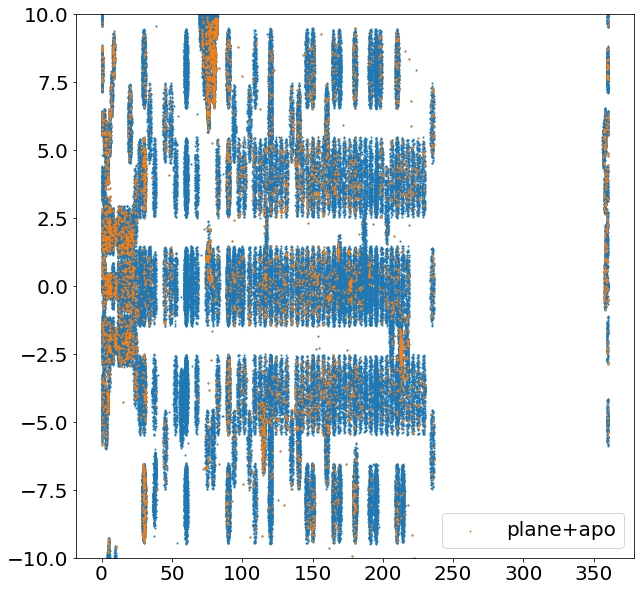

In [10]:
plt.scatter(apo['GLON'], apo['GLAT'],s=1)
plt.scatter(comb['gl'], comb['gb'], s=1, label='plane+apo')
plt.legend(loc=4)
plt.ylim(-10, 10)
plt.show()

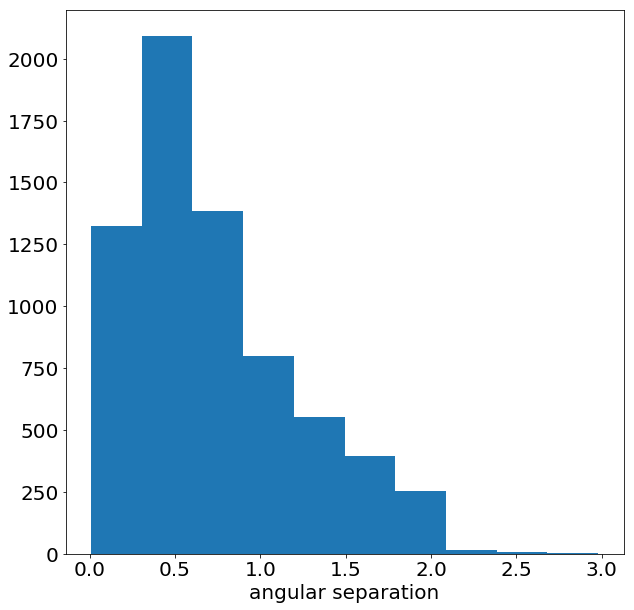

In [12]:
plt.hist(angsep.degree*3600)
plt.xlabel('angular separation')
plt.show()

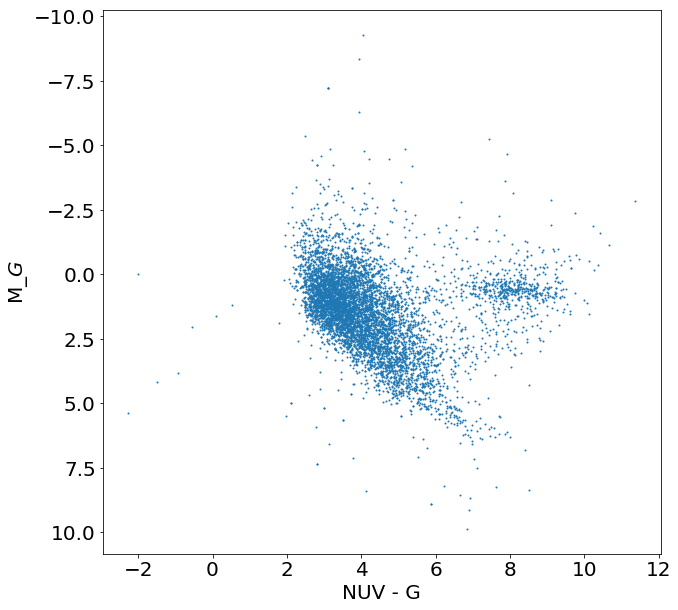

In [16]:
plt.scatter(comb['nuv']-comb['phot_g_mean_mag'], comb['phot_g_mean_mag']-comb['distmod'], s=1)
plt.gca().invert_yaxis()
plt.xlabel('NUV - G')
plt.ylabel('M_$G$')
plt.show()

In [50]:
comb = comb[np.where(comb['FE_H'] > -10)]
rccut = np.where((comb['nuv']-comb['phot_g_mean_mag'] > 6) & (comb['phot_g_mean_mag']-comb['distmod'] < 2) & (comb['FE_H'] > -1))
rc = comb[rccut]
len(rc)

527

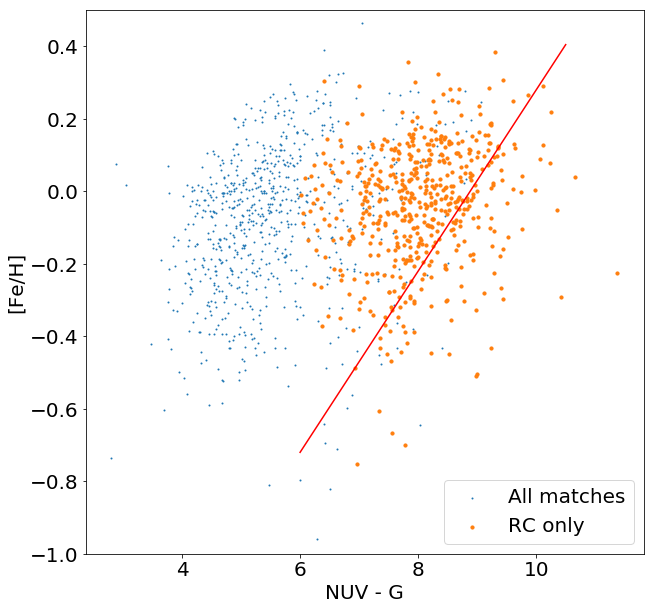

In [53]:
nuvgsamp = np.linspace(6, 10.5, 50)
fehsamp = 0.25*nuvgsamp - 2.22
plt.scatter(comb['nuv']-comb['phot_g_mean_mag'], comb['FE_H'], s=1, label='All matches')
plt.scatter(rc['nuv']-rc['phot_g_mean_mag'], rc['FE_H'], s=10, label='RC only')
plt.plot(nuvgsamp, fehsamp, c='red')
plt.xlabel('NUV - G')
plt.ylabel('[Fe/H]')
plt.ylim(-1, 0.5)
plt.legend(loc=4)
plt.show()

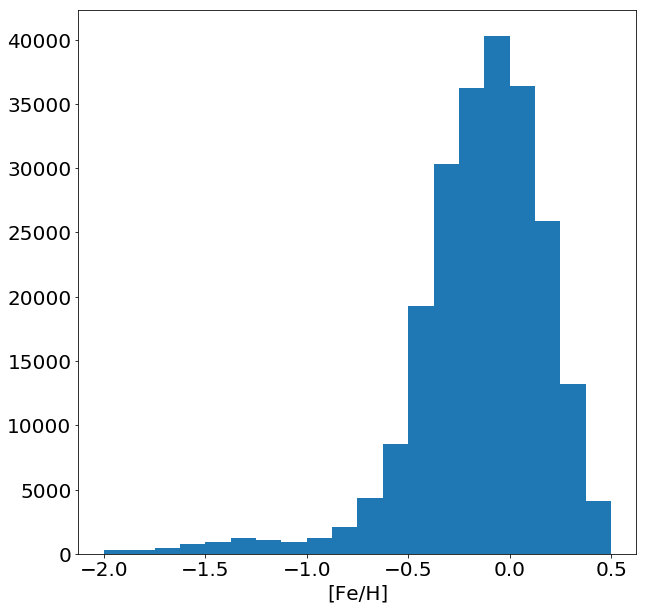

In [55]:
plt.hist(apo['FE_H'][np.where(apo['FE_H'] > -10)], bins=20, range=[-2, 0.5])
plt.xlabel('[Fe/H]')
plt.show()